# Machine Learning models to forecast the walmart dataset

In this notebook we are going to try to predict the weekly Walmart sales using machine larning models.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/walmart_clean.csv')
data.head()

,Store,Size,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Month,Year,Type_A,Type_B,Type_C
0,1,151315,2010-02-05,42.31,2.572,211.096358,8.106,0,1,24924.50,5,2,2010,1,0,0
1,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,3,14612.19,5,2,2010,0,1,0
2,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,4,26323.15,5,2,2010,0,1,0
3,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,5,36414.63,5,2,2010,0,1,0
4,35,103681,2010-02-05,27.19,2.784,135.352461,9.262,0,6,11437.81,5,2,2010,0,1,0


We drop the column date as we have three columns (week, month, year) to represent the date as integer.

In [3]:
data.drop('Date',axis=1, inplace=True)
data.head()

,Store,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Week,Month,Year,Type_A,Type_B,Type_C
0,1,151315,42.31,2.572,211.096358,8.106,0,1,24924.50,5,2,2010,1,0,0
1,35,103681,27.19,2.784,135.352461,9.262,0,3,14612.19,5,2,2010,0,1,0
2,35,103681,27.19,2.784,135.352461,9.262,0,4,26323.15,5,2,2010,0,1,0
3,35,103681,27.19,2.784,135.352461,9.262,0,5,36414.63,5,2,2010,0,1,0
4,35,103681,27.19,2.784,135.352461,9.262,0,6,11437.81,5,2,2010,0,1,0


In [4]:
data.shape

(420212, 15)

## Spliting the dataset into Train and Test

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    ridge_regression,
    Lasso,
    SGDRegressor,
    Ridge
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [6]:
y = data['Weekly_Sales']
X = data.drop(['Weekly_Sales', 'Store', 'Year'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (294148, 12) (294148,)
Test:  (126064, 12) (126064,)


## Linear Regression

In [7]:
LR = LinearRegression(normalize=True, fit_intercept=True)
LR.fit(X_train,y_train)

print("lr.coef_: {}".format(LR.coef_))
print("lr.intercept_: {}".format(LR.intercept_))

lr.coef_: [ 1.04033807e-01  1.45388866e+01 -3.76712327e+02 -1.64226613e+01
 -3.26457327e+02  1.14611420e+03  1.11626835e+02 -1.41794122e+02
  7.72364700e+02  2.81670251e+15  2.81670251e+15  2.81670251e+15]
lr.intercept_: -2816702512228213.5


In [8]:
print("Training set score: {:.2f}".format(LR.score(X_train, y_train)))
print("Test set score: {:.2f}".format(LR.score(X_test, y_test)))

Training set score: 0.09
Test set score: 0.08


In [9]:
y_pred = LR.predict(X_test)

/home/ana/Documents/UAO/ML/walmart-sales-forecast/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

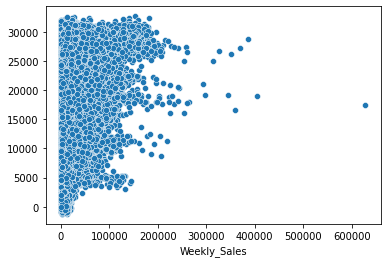

In [10]:
sns.scatterplot(y_test, y_pred)

## KNN Regressor

In [11]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=4, n_neighbors=10)

In [12]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.59
Test set score: 0.50


In [16]:
y_pred = knn.predict(X_test)

/home/ana/Documents/UAO/ML/walmart-sales-forecast/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

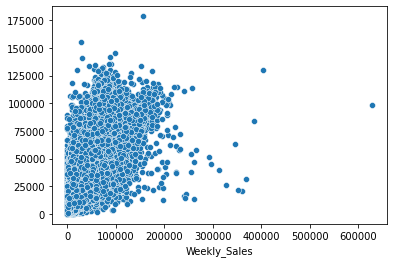

In [17]:
sns.scatterplot(y_test, y_pred)

## Decission Tree Regressor

In [19]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
print("Training set score: {:.2f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.2f}".format(tree.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.95


In [22]:
y_pred = tree.predict(X_test)

/home/ana/Documents/UAO/ML/walmart-sales-forecast/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

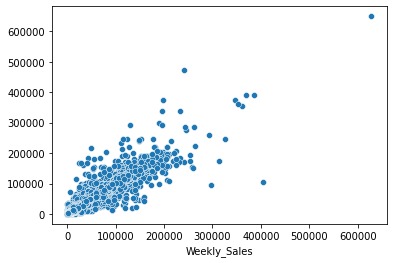

In [23]:
sns.scatterplot(y_test, y_pred)

## Random Forest Regressor

In [27]:
forest = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=400, n_jobs=5)

In [28]:
print("Training set score: {:.2f}".format(forest.score(X_train, y_train)))
print("Test set score: {:.2f}".format(forest.score(X_test, y_test)))

Training set score: 0.98
Test set score: 0.96


In [29]:
y_pred = forest.predict(X_test)

/home/ana/Documents/UAO/ML/walmart-sales-forecast/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weekly_Sales'>

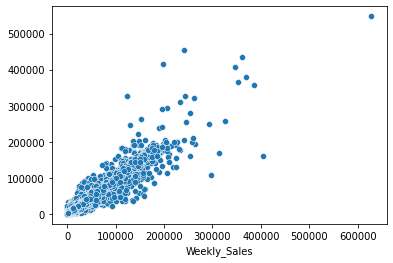

In [30]:
sns.scatterplot(y_test, y_pred)